# 0. Loading all Data

In [2]:
%reload_ext autoreload
%autoreload 2
from B_model import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from tensorflow import keras
import os
import glob
import pandas as pd

all_metrics_df,testParamDf = data_generation()

Init Plugin
Init Graph Optimizer
Init Kernel
Unique DODs 18
Unique discharging_protocol 23
Unique charging_protocol 47
8
12
5


# Result Selection # =====# Result Selection # =====# Result Selection # =====# Result Selection # =====

In [3]:
#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combined_csv = pd.concat([pd.read_csv(f,index_col = 0) for f in all_filenames ])
#combined_csv = combined_csv.drop_duplicates(['argu','loss_fun','class_weight',	'nl','opt','epochs'])
#combined_csv= combined_csv[combined_csv['argu']!=0]
#combined_csv.to_csv('final_result.csv')
#combined_csv.shape

In [4]:
result_all = pd.read_csv('final_result.csv',index_col=False)
result_all

,Unnamed: 0,argu,loss_fun,class_weight,nl,opt,epochs,Rsquare_median,R_greater_80,R_greater_85
0,0,3.0,mse,"{0: 1, 1: 1, 2: 1}","[40, 10]",Adam,150.0,-0.835696,0.113636,0.113636
1,1,3.0,mse,"{0: 1, 1: 1, 2: 1}","[40, 10]",Adam,300.0,-0.274448,0.181818,0.181818
2,2,3.0,mse,"{0: 1, 1: 1, 2: 1}","[40, 10]",RMSprop,150.0,-0.460628,0.136364,0.113636
3,3,3.0,mse,"{0: 1, 1: 1, 2: 1}","[40, 10]",RMSprop,300.0,-0.615311,0.227273,0.227273
4,4,3.0,mse,"{0: 1, 1: 1, 2: 1}","[70, 40, 10]",Adam,150.0,-0.871045,0.159091,0.159091
...,...,...,...,...,...,...,...,...,...,...
2635,435,1.0,mse,"{0: 8, 1: 3, 2: 1}","[100, 40]",RMSprop,300.0,0.287603,0.295455,0.204545
2636,436,1.0,mse,"{0: 8, 1: 3, 2: 1}","[100, 70]",Adam,150.0,-0.205974,0.272727,0.250000
2637,437,1.0,mse,"{0: 8, 1: 3, 2: 1}","[100, 70]",Adam,300.0,-0.788332,0.159091,0.113636
2638,438,1.0,mse,"{0: 8, 1: 3, 2: 1}","[100, 70]",RMSprop,150.0,0.496980,0.363636,0.318182


In [5]:
result_all.sort_values('Rsquare_median',ascending=False)[0:10]

,Unnamed: 0,argu,loss_fun,class_weight,nl,opt,epochs,Rsquare_median,R_greater_80,R_greater_85
1684,364,2.0,mae,"{0: 8, 1: 1, 2: 1}","[100, 40, 10]",Adam,150.0,0.908087,0.613636,0.568182
2046,286,3.0,mae,"{0: 6, 1: 1, 2: 1}","[100, 70, 10]",RMSprop,150.0,0.896435,0.545455,0.545455
852,412,1.0,mae,"{0: 8, 1: 3, 2: 1}","[70, 10]",Adam,150.0,0.896207,0.590909,0.545455
451,11,1.0,mae,"{0: 1, 1: 1, 2: 1}","[100, 70, 40, 10]",RMSprop,300.0,0.890770,0.590909,0.545455
845,405,1.0,mae,"{0: 8, 1: 3, 2: 1}","[100, 70, 40, 10]",Adam,300.0,0.885324,0.522727,0.522727
1685,365,2.0,mae,"{0: 8, 1: 1, 2: 1}","[100, 40, 10]",Adam,300.0,0.884888,0.636364,0.568182
716,276,1.0,mae,"{0: 6, 1: 1, 2: 1}","[100, 40, 10]",Adam,150.0,0.879945,0.545455,0.522727
1780,20,3.0,mae,"{0: 1, 1: 1, 2: 1}","[100, 70, 10]",Adam,150.0,0.879013,0.568182,0.522727
840,400,1.0,mae,"{0: 8, 1: 3, 2: 1}","[70, 40, 10]",Adam,150.0,0.874982,0.568182,0.522727
1603,283,2.0,mae,"{0: 6, 1: 1, 2: 1}","[70, 10]",RMSprop,300.0,0.874908,0.568182,0.545455


In [33]:
result_all.sort_values('Rsquare_median',ascending=True)[1100:1120]

,Unnamed: 0,argu,loss_fun,class_weight,nl,opt,epochs,Rsquare_median,R_greater_80,R_greater_85
1349,29,2.0,mae,"{0: 1, 1: 1, 2: 1}","[70, 40]",Adam,300.0,0.291160,0.295455,0.250000
1394,74,2.0,mae,"{0: 1, 1: 3, 2: 1}","[70, 40]",RMSprop,150.0,0.291407,0.318182,0.295455
1087,207,2.0,mse,"{0: 4, 1: 1, 2: 1}","[70, 40]",RMSprop,300.0,0.292031,0.386364,0.363636
1939,179,3.0,mae,"{0: 4, 1: 1, 2: 1}","[40, 10]",RMSprop,300.0,0.292419,0.386364,0.318182
2360,160,1.0,mse,"{0: 2, 1: 3, 2: 1}","[70, 40]",Adam,150.0,0.292487,0.340909,0.295455
1446,126,2.0,mae,"{0: 2, 1: 1, 2: 1}","[100, 40]",RMSprop,150.0,0.293740,0.318182,0.295455
1696,376,2.0,mae,"{0: 8, 1: 1, 2: 1}","[100, 10]",Adam,150.0,0.293844,0.340909,0.295455
2459,259,1.0,mse,"{0: 4, 1: 3, 2: 1}","[100, 40]",RMSprop,300.0,0.294287,0.318182,0.295455
2639,439,1.0,mse,"{0: 8, 1: 3, 2: 1}","[100, 70]",RMSprop,300.0,0.294445,0.227273,0.204545
1866,106,3.0,mae,"{0: 2, 1: 1, 2: 1}","[70, 10]",RMSprop,150.0,0.295138,0.272727,0.227273


In [41]:
arg1_selected = result_all.sort_values('Rsquare_median',ascending=False)[0:10].index

# Plotting

In [19]:
import seaborn as sns
sns.set_theme(style="darkgrid")
#group by argu + opt and show the mean or median or the error
def plot_tune_result(arg1,arg2,error):
    output = result_all.groupby([arg1,arg2])['Rsquare_median'].aggregate([np.mean,np.median]).reset_index()
    #display(output)
    ax = sns.lineplot(x = arg1, y = error, 
                data = output, 
                hue= arg2,)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    ax.set(xlabel='{}'.format(arg1), ylabel='Rsquare')
    plt.show()


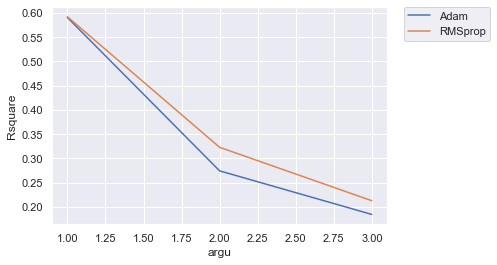

In [69]:
plot_tune_result('argu','opt','median')

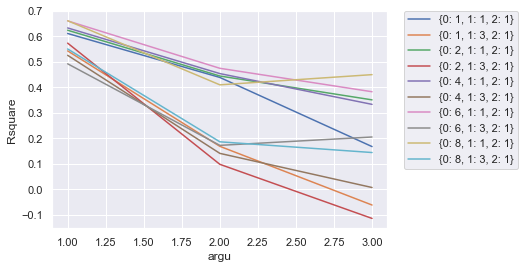

In [70]:
plot_tune_result('argu','class_weight','median')

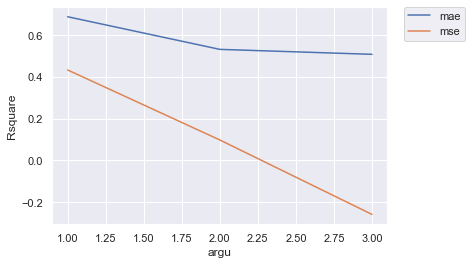

In [71]:
plot_tune_result('argu','loss_fun','median')

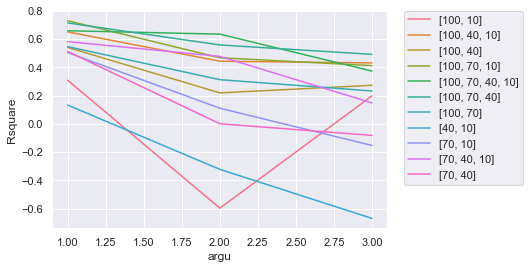

In [72]:
plot_tune_result('argu','nl','median')

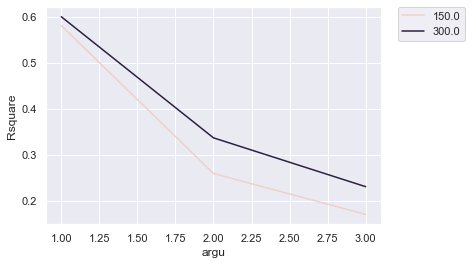

In [73]:
plot_tune_result('argu','epochs','median')

In [83]:
def plot_tune_result_3(arg1,arg2,arg3):
    sns.set_theme(style="darkgrid")

    output = result_all.groupby([arg1,arg2,arg3])['Rsquare_median'].aggregate([np.mean,np.median]).reset_index()
    
    #palette = sns.color_palette("rocket_r",n_color = )
    # Plot the lines on two facets
    ax = sns.relplot(
            data=output,
            x= arg1, y= 'mean',
            hue= arg2, col= arg3,
            kind="line",
            height=5, aspect=.75, facet_kws=dict(sharex=False),
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    ax.set(xlabel='{}'.format(arg1), ylabel='R_square')
    plt.show()

No handles with labels found to put in legend.


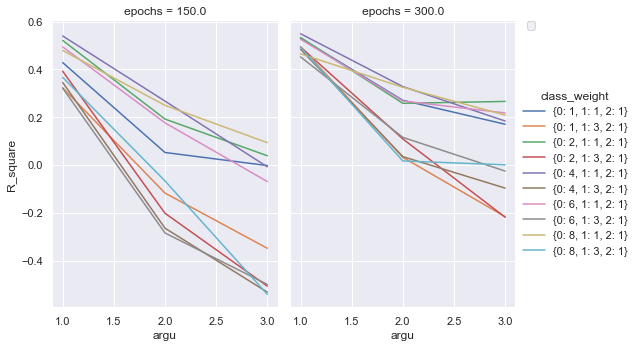

In [84]:
plot_tune_result_3('argu','class_weight','epochs')

No handles with labels found to put in legend.


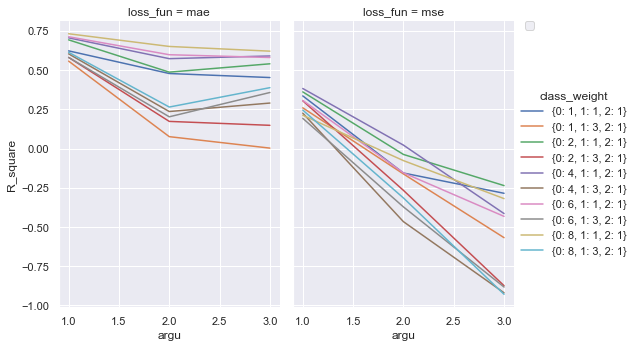

In [85]:
plot_tune_result_3('argu','class_weight','loss_fun')

# Result Selection # =====# Result Selection # =====# Result Selection # =====# Result Selection # =====

# 1. Data Preparation

## 1.1 Choose a Data Version

In [23]:
# 2nd Order Raw only!
test_coef = ["0","2","3","4","exponential"]
func_coef = ["raw","second","third","forth","exponential"]
for i in range(0,1):
    globals()[f'X{test_coef[i]}'],globals()[f'y{test_coef[i]}'],globals()[f'Y{test_coef[i]}'],globals()[f'X_Y_merged{test_coef[i]}'] = \
        eval(func_coef[i]+"_order_poly_fitting(all_metrics_df,testParamDf)")

version = '0' #raw ones
X,y,Y,X_Y_merged = eval('X'+version),eval('y'+version),eval('Y'+version),eval('X_Y_merged'+version)
objective = eval('objective_'+version)

## 1.2 Models Construction

In [24]:
model_raw = battery_model(0,X,y,Y,X_Y_merged,objective)

## 1.3 Data Argumentation

### (Reset)

# 2. Training

In [25]:
pd.options.mode.chained_assignment = None  # default='warn'

```python
index = 0  
for i0 in argu_all:
    model_raw_copy1 = copy.deepcopy(model_raw)
    model_raw_copy1.input_argumentation_update(i0)
    model_raw_copy2 = copy.deepcopy(model_raw_copy1)
    for i1 in loss_fun_all:
        for i2 in class_weight_all:
            for i3 in nl_all:
                for i4 in opt_all:
                    for i5 in epochs_all:
                        model_raw_copy = copy.deepcopy(model_raw_copy2)
                        result['argu'][index] = i0
                        result['loss_fun'][index] = i1
                        result['class_weight'][index] = "{}".format(i2)
                        result['nl'][index] = "{}".format(i3)
                        result['opt'][index] = i4
                        result['epochs'][index] = i5
                        result['error'][index] = model_raw_copy.model_construction_and_training(all_metrics_df,i1,i2,i3,i4,i5,0)
                        index+=1
                        print (i0,i1,i2,i3,i4,i5)
```


# Result

In [26]:
model_raw_copy = copy.deepcopy(model_raw)

In [55]:
arg1_selected[1]

2046

In [56]:
result_all['argu'][286]

3.0

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


2021-12-01 18:59:36.777362: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-01 18:59:36.777840: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-12-01 18:59:36.859064: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-01 18:59:36.861950: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-01 18:59:37.031763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 18:59:37.210326: I tensorflow/core/grappler/

2021-12-01 19:00:32.560503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 19:00:32.768377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 19:00:32.898181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2021-12-01 19:00:45.666498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 19:00:45.866254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 19:00:45.998639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 19:00:52.426753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 19:00:52.619709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 19:00:52.750241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 19:00:59.237847: I tensorflow/core/grappler/optimizers/cust

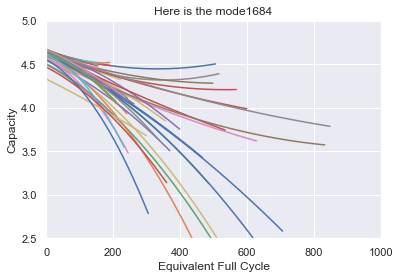

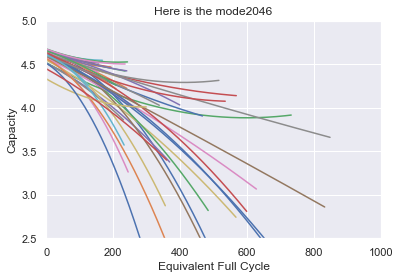

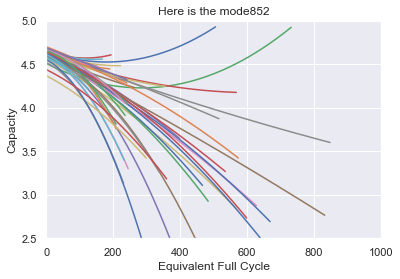

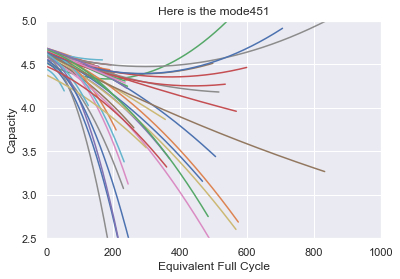

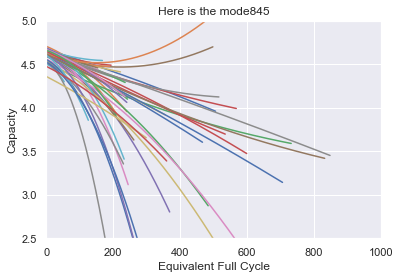

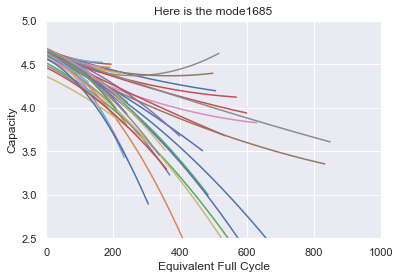

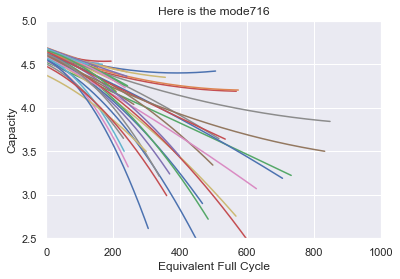

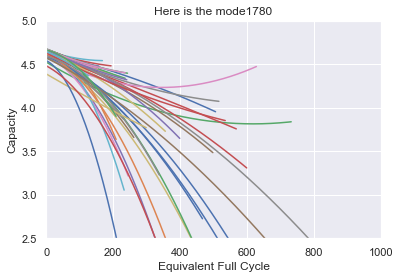

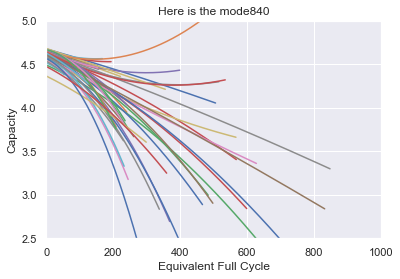

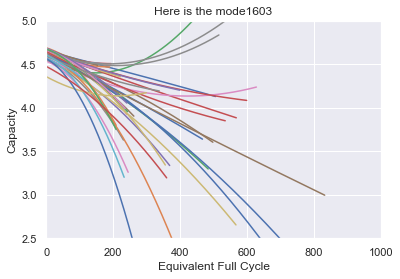

In [57]:
records = []
for i in arg1_selected:
    i0 = int(result_all['argu'][i])
    i1 = result_all['loss_fun'][i]
    i2 =eval(result_all['class_weight'][i])
    i3 = eval(result_all['nl'][i])
    i4 = result_all['opt'][i]
    i5 = int(result_all['epochs'][i])
    
    model_raw_copy1 = copy.deepcopy(model_raw_copy)
    model_raw_copy1.input_argumentation_update(i0)
    model_raw_copy2 = copy.deepcopy(model_raw_copy1)
    records.append(model_raw_copy2.model_construction_and_training('zscore',all_metrics_df,i1,i2,i3,i4,i5,0))
    plt.figure(i)
    model_raw_copy2.plot_curve("test",all_metrics_df,1000,2.5)
    plt.title("Here is the mode{}".format(i))


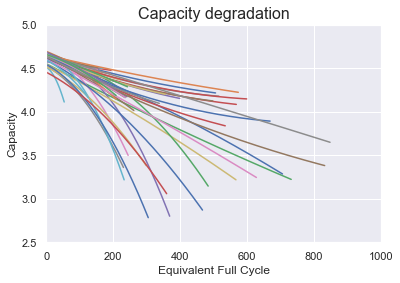

In [58]:
model_raw_copy2.plot_curve("test_true",all_metrics_df,1000,2.5)

In [34]:
#439	1.0	mse	{0: 8, 1: 3, 2: 1}	[100, 70]	RMSprop	300.0	0.294445	0.227273	0.204545
i  = 1349
i0 = int(result_all['argu'][i])
i1 = result_all['loss_fun'][i]
i2 =eval(result_all['class_weight'][i])
i3 = eval(result_all['nl'][i])
i4 = result_all['opt'][i]
i5 = int(result_all['epochs'][i])

model_raw_copy1 = copy.deepcopy(model_raw_copy)
model_raw_copy1.input_argumentation_update(i0)
model_raw_copy2 = copy.deepcopy(model_raw_copy1)
model_raw_copy2.model_construction_and_training('range',all_metrics_df,i1,i2,i3,i4,i5,0)

2021-12-01 20:17:23.940811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 20:17:24.062398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 20:17:36.894220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[0.15077383279090317,
 0.008114599424194346,
 -67.63638858474195,
 -3.1188659420821603,
 0.7776332449744919,
 -84.5318073281995,
 0.9367892525993479,
 -2.1199846022480813,
 -47.11019437714949,
 -1.4209288749225917,
 0.8455424045982555,
 -6.859132682031161,
 -0.08420358444746157,
 0.7140396721962241,
 0.5299375105776234,
 -612.7231558000245,
 0.7107420662144392,
 0.8556961175347773,
 0.8847604768115473,
 0.9201777260538928,
 -2140.5398635432653,
 0.8774488844026356,
 -0.895787205600421,
 -637.5538501643091,
 -95.62682545956953,
 -5.570905610173335,
 -0.5610192397714697,
 -49.62102078697329,
 -9.020374231563782,
 0.9509467557851762,
 -30.924568913846507,
 -2683.265150804713,
 -4.660532060499279,
 0.8777991550556479,
 0.5849504110554675,
 0.5734203005315734,
 -0.35503992189900613,
 -341.2951449796342,
 -4.800904173881759,
 0.6277191206140185,
 0.8120948007018862,
 -35811.679505176005,
 0.1171249221325199,
 0.014130853465962656]

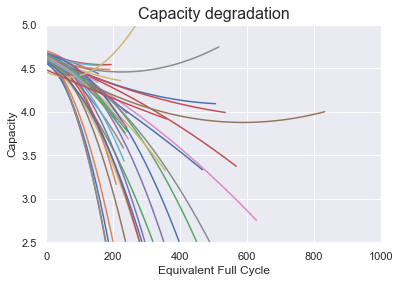

In [35]:
model_raw_copy2.plot_curve("test",all_metrics_df,1000,2.5)

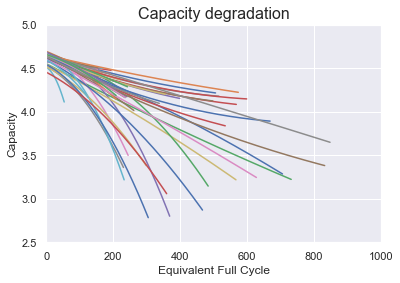

In [36]:
sns.set_theme(style="darkgrid")
model_raw_copy2.plot_curve("test_true",all_metrics_df,1000,2.5)

In [3]:
argu_all = np.arange(1,3)

loss_fun_0 = 'mse'
loss_fun_1 = 'mae'
loss_fun_all = [loss_fun_0,loss_fun_1]

class_weight_all = []
for i in range(1,10):
    for k in range(1,5,2):
        if i <= 2:
            class_weight_all.append({0: i,
                                1: k,
                                2: 1})
        elif i%2==0:
            class_weight_all.append({0: i,
                                1: k,
                                2: 1})
nl_all = []
for i in range(10,101,30):
    for j in range(i+30,101,30):
        nl_all.append([j,i])
        for k in range(j+30,101,30):
            nl_all.append([k,j,i])
            for z in range(k+30,101,30):
                nl_all.append([z,k,j,i])
opt_all = ['Adam', 'RMSprop']
epochs_all = [150,300]
rows = len(argu_all)*len(loss_fun_all)*len(class_weight_all)*len(nl_all) *len(opt_all)*len(epochs_all)

In [2]:
import numpy as np
np.arange(1,3)

array([1, 2])

In [4]:
class_weight_all

[{0: 1, 1: 1, 2: 1},
 {0: 1, 1: 3, 2: 1},
 {0: 2, 1: 1, 2: 1},
 {0: 2, 1: 3, 2: 1},
 {0: 4, 1: 1, 2: 1},
 {0: 4, 1: 3, 2: 1},
 {0: 6, 1: 1, 2: 1},
 {0: 6, 1: 3, 2: 1},
 {0: 8, 1: 1, 2: 1},
 {0: 8, 1: 3, 2: 1}]

In [5]:
nl_all

[[40, 10],
 [70, 40, 10],
 [100, 70, 40, 10],
 [100, 40, 10],
 [70, 10],
 [100, 70, 10],
 [100, 10],
 [70, 40],
 [100, 70, 40],
 [100, 40],
 [100, 70]]